# Taller 7
Métodos Computacionales para Políticas Públicas - URosario

**Entrega: viernes 3-abr-2020 11:59 PM**

<div class="alert alert-success">

**[Andrés Ramírez Vela]** <br><br>

[andrese.ramirez@urosario.edu.co]
</div>

## Instrucciones:
- Guarde una copia de este *Jupyter Notebook* en su computador, idealmente en una carpeta destinada al material del curso.
- Modifique el nombre del archivo del *notebook*, agregando al final un guión inferior y su nombre y apellido, separados estos últimos por otro guión inferior. Por ejemplo, mi *notebook* se llamaría: mcpp_taller7_santiago_matallana
- Marque el *notebook* con su nombre y e-mail en el bloque verde arriba. Reemplace el texto "[Su nombre acá]" con su nombre y apellido. Similar para su e-mail.
- Desarrolle la totalidad del taller sobre este *notebook*, insertando las celdas que sea necesario debajo de cada pregunta. Haga buen uso de las celdas para código y de las celdas tipo *markdown* según el caso.
- Recuerde salvar periódicamente sus avances.
- Cuando termine el taller:
    1. Descárguelo en PDF. Si tiene algún problema con la conversión, descárguelo en HTML.
    2. Suba todos los archivos a su repositorio en GitHub, en una carpeta destinada exclusivamente para este taller, antes de la fecha y hora límites.

(Todos los ejercicios tienen el mismo valor.)

---

Este taller tiene dos partes. Una obligatoria, relativamente fácil, y otra voluntaria y más retadora. Los invito a intentar desarrollar el taller en su totalidad. (Buen plan para el aislamiento obligatorio.)

En este taller exploraremos los datos de crimen de Chicago. 

Descargue los datos de crimen del Chicago Data Portal solo para el año 2015 (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data).

### Parte obligatoria

### 1.
Calcule el número de crímenes en cada Community Area en 2015. Haga un gráfico de barras que lo ilustre.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [38.0, 20.0]
plt.style.use('ggplot')

In [2]:
crimes = pd.read_csv('Crimes_-_2001_to_present.csv', parse_dates=['Date'])

In [3]:
type(crimes)

pandas.core.frame.DataFrame

In [4]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12021303,JD198763,2015-07-01 09:35:00,055XX S RUTHERFORD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,23.0,56,11,NaN,NaN,2015,04/01/2020 03:52:24 PM,NaN,NaN,NaN
1,11768614,JC361321,2015-01-01 00:00:00,030XX W 41ST ST,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,...,12.0,58,17,NaN,NaN,2015,03/23/2020 03:47:32 PM,NaN,NaN,NaN
2,11752913,JC342515,2015-01-01 00:00:00,030XX W 41ST ST,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,12.0,58,17,NaN,NaN,2015,03/23/2020 03:47:32 PM,NaN,NaN,NaN
3,12014151,JD191104,2015-01-20 13:50:00,057XX W LAKE ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,29.0,25,11,NaN,NaN,2015,03/21/2020 03:46:49 PM,NaN,NaN,NaN
4,10509684,HZ251005,2015-12-25 08:00:00,0000X N WALLER AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,29.0,25,17,NaN,NaN,2015,03/20/2020 03:47:50 PM,NaN,NaN,NaN


In [5]:
crimes['Description'].to_frame()

,Description
0,FINANCIAL IDENTITY THEFT OVER $ 300
1,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER
2,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER
3,FINANCIAL IDENTITY THEFT OVER $ 300
4,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER
...,...
264344,AGGRAVATED: HANDGUN
264345,ARMED: HANDGUN
264346,DOMESTIC BATTERY SIMPLE
264347,SIMPLE


In [6]:
crimes_by_community = crimes.groupby("Community Area")

In [7]:
crimes_by_community.groups

{0: Int64Index([158331, 232738], dtype='int64'),
 1: Int64Index([     8,    105,    300,    345,    767,    806,    838,    900,
                935,    957,
             ...
             264046, 264056, 264080, 264170, 264225, 264226, 264257, 264284,
             264300, 264319],
            dtype='int64', length=3592),
 2: Int64Index([    77,    104,    154,    194,    199,    306,    357,    442,
                508,    662,
             ...
             263317, 263447, 263465, 263608, 263904, 263952, 264168, 264169,
             264297, 264321],
            dtype='int64', length=3113),
 3: Int64Index([    54,     90,    391,    423,    448,    462,    651,    663,
                690,    715,
             ...
             263918, 263919, 263926, 264067, 264078, 264127, 264156, 264158,
             264213, 264302],
            dtype='int64', length=3665),
 4: Int64Index([   492,    672,    722,    842,   1750,   1776,   1831,   1924,
               2361,   2678,
             ...
   

In [18]:
community_crime_count = crimes_by_community['Community Area'].agg('count')
community_crime_count

Community Area
0        2
1     3592
2     3113
3     3665
4     1770
      ... 
73    3170
74     619
75    2088
76    1749
77    2262
Name: Community Area, Length: 78, dtype: int64

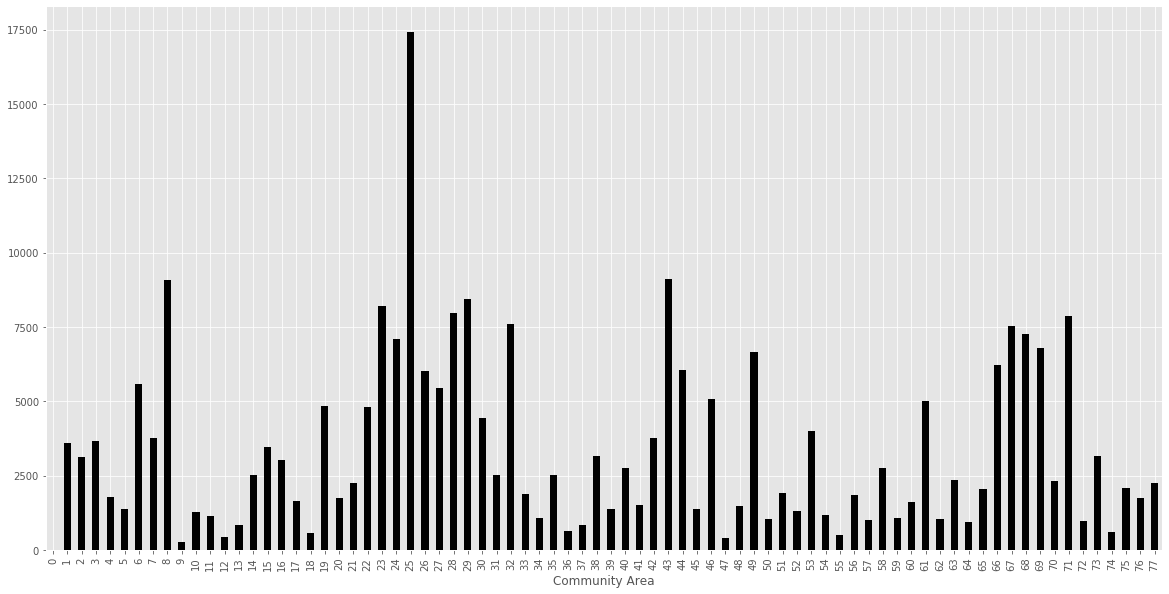

In [24]:
community_crime_count.plot(kind='bar', color='Black', figsize=(20,10));

### 2.
Ordene las Community Areas de acuerdo con el número de crímenes. ¿Qué Community Area (por nombre, idealmente) presenta el mayor número de crímenes? ¿El menor?

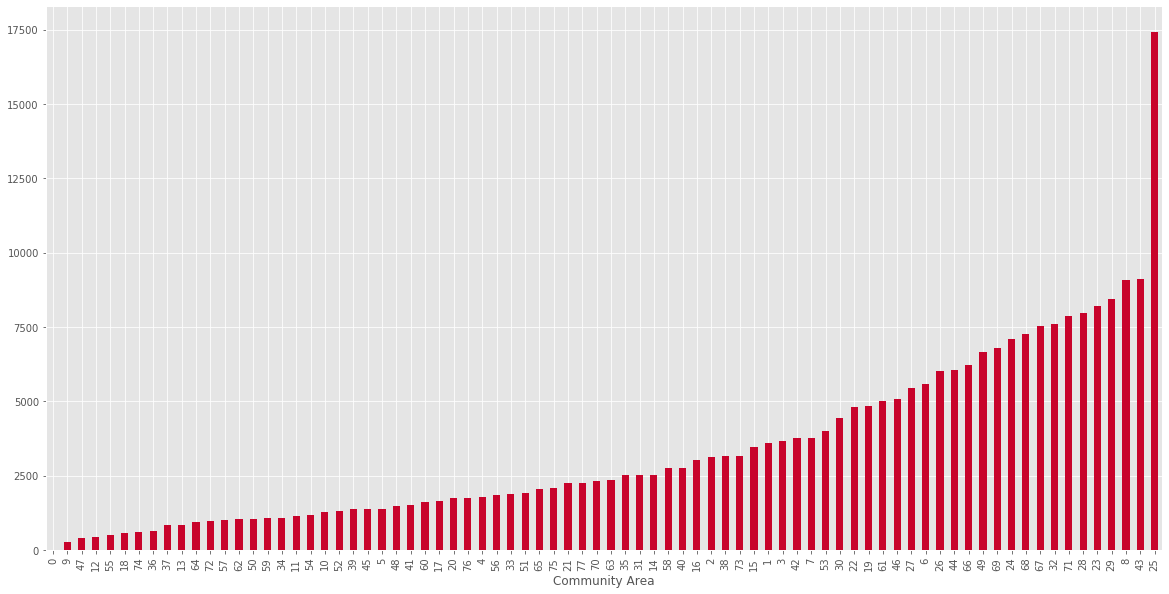

In [25]:
organize = crimes_by_community['Community Area'].agg('count')
organize.sort_values()
x =organize.sort_values()
x.plot(kind='bar', color="#C8032B", figsize=(20,10));

La Community Area que presenta el menor número de crimenes es Edison Park ubicado al norte de la ciudad y representado en la gráfica con el número 9. Por el contrario, la Community Area con mayor número de crimenes es Austin ubicado al occidente de la ciudad y representado por el número 25 en la gráfica.

---

### 3.
Cree una tabla cuyas filas sean días del año (yyyy-mm-dd) y las columnas las 77 Community Areas. En cada campo de la tabla deberá haber el correspondiente número de crímenes. Seleccione algunas Community Areas que le llamen la atención y haga un gráfico de serie de tiempo.

Pista: El siguiente código puede serle útil.

In [11]:
# Create function to strip time from date field, and use it to create another column
def to_day(timestamp):
    return timestamp.replace(minute=0,hour=0, second=0)

crimes['Day'] = crimes['Date'].apply(to_day)

In [12]:
crimes_by_community_day = crimes.groupby(["Community Area","Day"])

In [13]:
community_crime_count1 = crimes_by_community_day['ID'].agg('count')
community_crime_count1.to_frame()

ID
Community Area Day           
0              2015-01-14   1
               2015-10-08   1
1              2015-01-01  18
               2015-01-02   5
               2015-01-03   7
...                        ..
77             2015-12-27   2
               2015-12-28   9
               2015-12-29   6
               2015-12-30   4
               2015-12-31   4

[26915 rows x 1 columns]

In [14]:
community_crime_count2 =community_crime_count1.unstack("Community Area")
community_crime_count2

Community Area,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
Day,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,18.0,13.0,15.0,6.0,5.0,25.0,15.0,48.0,1.0,...,31.0,31.0,9.0,53.0,3.0,10.0,2.0,9.0,7.0,10.0
2015-01-02,NaN,5.0,9.0,8.0,3.0,2.0,10.0,9.0,27.0,NaN,...,12.0,22.0,6.0,17.0,1.0,11.0,1.0,3.0,6.0,5.0
2015-01-03,NaN,7.0,11.0,9.0,7.0,4.0,6.0,11.0,27.0,1.0,...,23.0,12.0,8.0,18.0,NaN,8.0,1.0,7.0,3.0,3.0
2015-01-04,NaN,12.0,7.0,9.0,10.0,3.0,15.0,5.0,16.0,1.0,...,13.0,15.0,9.0,12.0,1.0,5.0,NaN,1.0,6.0,1.0
2015-01-05,NaN,6.0,7.0,5.0,4.0,5.0,15.0,7.0,11.0,1.0,...,16.0,12.0,8.0,17.0,NaN,5.0,2.0,2.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,NaN,13.0,8.0,6.0,4.0,1.0,16.0,10.0,35.0,NaN,...,13.0,19.0,4.0,26.0,2.0,8.0,2.0,1.0,4.0,2.0
2015-12-28,NaN,7.0,8.0,6.0,2.0,2.0,14.0,9.0,19.0,NaN,...,12.0,23.0,9.0,14.0,2.0,6.0,2.0,2.0,3.0,9.0
2015-12-29,NaN,6.0,8.0,14.0,8.0,4.0,10.0,5.0,24.0,NaN,...,19.0,16.0,7.0,19.0,NaN,8.0,3.0,3.0,3.0,6.0


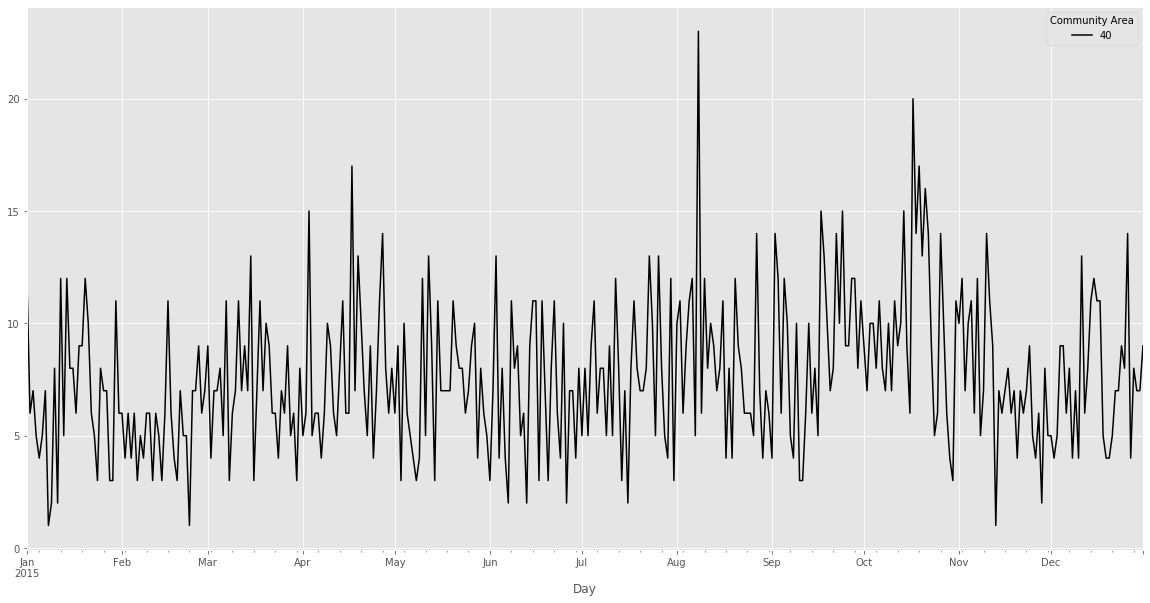

In [26]:
community_crime_count2[[40]].plot(color= "Black" , figsize=(20,10));

---

### Parte voluntaria

Descargue la base de datos de información socioeconómica (https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2).

### 4.
Cree una tabla que agregue el número de crímenes por Community Area. Una esa tabla con la de datos socioeconómicos y cree un "scatter plot" de número de crímenes vs ingreso per cápita. Explique la relación en palabras.